In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns ; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [79]:
data=pd.read_csv('Rainfall1.csv')
data

,Unnamed: 0.1,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,0,11-01-2017,Chennai,8.0,24.3,0.0,3.4,6.3,NW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,1,1,11-02-2017,Chennai,14.0,26.9,3.6,4.4,9.7,ENE,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2,2,11-03-2017,Chennai,13.7,23.4,3.6,5.8,3.3,NW,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,3,3,11-04-2017,Chennai,13.3,15.5,39.8,7.2,9.1,NW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,4,4,11-05-2017,Chennai,7.6,16.1,2.8,5.6,10.6,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,361,361,10/27/2018,Chennai,9.0,30.7,0.0,7.6,12.1,NNW,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
324,362,362,10/28/2018,Chennai,7.1,28.4,0.0,11.6,12.7,N,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
325,363,363,10/29/2018,Chennai,12.5,19.9,0.0,8.4,5.3,ESE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
326,364,364,10/30/2018,Chennai,12.5,26.9,0.0,5.0,7.1,NW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [80]:
data.columns
data1=data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [81]:
data1.shape

(328, 24)

In [82]:
data1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [83]:
data1.RainToday.value_counts()

No     267
Yes     61
Name: RainToday, dtype: int64

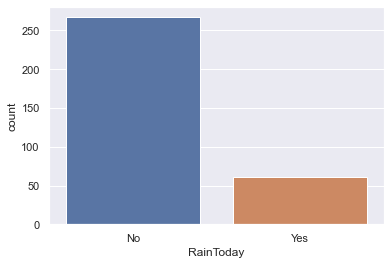

In [84]:
g=sns.countplot(x="RainToday",data=data1)

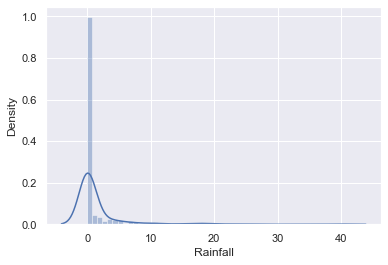

In [85]:
g=sns.distplot(data1["Rainfall"])

In [86]:
data1.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [87]:
data1['RainToday'] = data1['RainToday'].apply(lambda x:1  if x =='Yes' else 0)
train = data1[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir3pm',
        'WindSpeed3pm',  'Humidity3pm',
        'Pressure3pm',  'Cloud3pm', 
       'Temp3pm', 'RainToday', 'RISK_MM']]
data1["RainTomorrow"]=data1["RainTomorrow"].apply(lambda x:1 if x=="Yes" else 0)
label=data1["RainTomorrow"]

In [88]:
data1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11-01-2017,Chennai,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,11-02-2017,Chennai,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,11-03-2017,Chennai,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,11-04-2017,Chennai,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,11-05-2017,Chennai,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,10/27/2018,Chennai,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0,0
324,10/28/2018,Chennai,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0,0
325,10/29/2018,Chennai,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0,0
326,10/30/2018,Chennai,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0,0


In [89]:
train=pd.get_dummies(train,columns=['WindGustDir','WindDir3pm'])

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, y_train , x_test , y_test = train_test_split(train,label,test_size=0.6)

In [92]:
# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [94]:
mod1=LogisticRegression()

In [95]:
mod1.fit(x_train,x_test)

LogisticRegression()

In [96]:
lf=mod1.predict(y_train)

In [97]:
acc=accuracy_score(y_test,lf)
acc

0.9796954314720813

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
cn=confusion_matrix(y_test,lf)

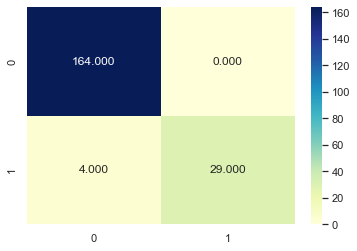

In [101]:
labels=[0,1]
sns.heatmap(cn,annot=True,cmap="YlGnBu",fmt=".3f",xticklabels=labels,yticklabels=labels)
plt.show()

In [102]:
#Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
mod2=RandomForestClassifier()

In [107]:
mod2.fit(x_train,x_test)

RandomForestClassifier()

In [112]:
RF=mod2.predict(y_train)

In [114]:
acc1=accuracy_score(y_test,RF)
acc1

0.9746192893401016

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
cn1=confusion_matrix(y_test,RF)

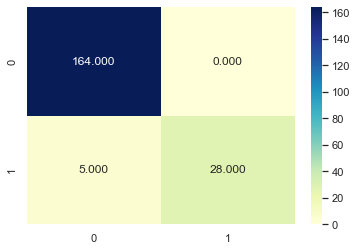

In [119]:
labels=[0,1]
sns.heatmap(cn1,annot=True,cmap="YlGnBu",fmt=".3f",xticklabels=labels,yticklabels=labels)
plt.show()

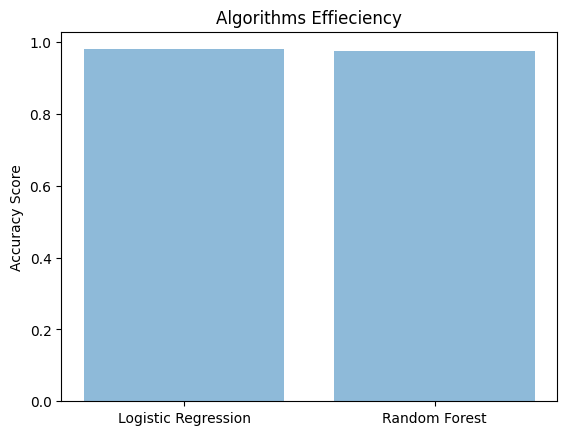

In [121]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
objects=('Logistic Regression','Random Forest')
y_pos=np.arange(len(objects))
performance=[acc,acc1]
plt.bar(y_pos,performance,align='center',alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Accuracy Score')
plt.title('Algorithms Effieciency')

plt.show()